In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = [12, 6]

from datetime import timedelta
import datetime as dt
from utils import data_utils, dataframe_util

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train, test = data_utils.load_dataset(op_scope='5')
print 'train: {}, test: {}'.format(train.shape, test.shape)
print 'load fastest routes dataset...'
train_fr_1 = pd.read_csv('../input/fastest_routes_train_part_1.csv')
train_fr_2 = pd.read_csv('../input/fastest_routes_train_part_2.csv')
test_fr = pd.read_csv('../input/fastest_routes_test.csv')

train_fr = pd.concat((train_fr_1, train_fr_2))

train = train.merge(train_fr, how='left', on='id')
test = test.merge(test_fr, how='left', on='id')

train: (1458644, 91), test: (625134, 90)
load fastest routes dataset...


In [3]:
starting_street_heavy = train.groupby(['starting_street'])['trip_duration'].mean().reset_index()
street_heavy_map = starting_street_heavy.set_index('starting_street').T.to_dict('list')
for (k, v) in street_heavy_map.items():
    street_heavy_map[k] = v[0]

train['starting_street_heavy'] = train['starting_street'].map(street_heavy_map)
test['starting_street_heavy'] = test['starting_street'].map(street_heavy_map)

end_street_heavy = train.groupby(['end_street'])['trip_duration'].mean().reset_index()
street_heavy_map = end_street_heavy.set_index('end_street').T.to_dict('list')
for (k, v) in street_heavy_map.items():
    street_heavy_map[k] = v[0]

train['end_street_heavy'] = train['end_street'].map(street_heavy_map)
test['end_street_heavy'] = test['end_street'].map(street_heavy_map)

# total_distance vs steps
train['per_step_distance'] = train['total_distance'] / train['number_of_steps']
test['per_step_distance'] = test['total_distance'] / test['number_of_steps']

# total_travel_time vs steps
train['per_travel_time'] = train['total_travel_time'] / train['number_of_steps']
test['per_travel_time'] = test['total_travel_time'] / test['number_of_steps']

In [4]:
train_fr.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [5]:
dataframe_util.contains_null(train[['id','step_direction']])

,column_name,missing_count,missing_rate
1,step_direction,1,6.855682e-07


In [6]:
train.shape

(1458644, 106)

In [7]:
train = train.loc[train['step_direction'].notnull(), :]

In [8]:
dataframe_util.contains_null(train[['id','step_direction']])

,column_name,missing_count,missing_rate


In [9]:
train['steps_left_count'] = train['step_direction'].map(lambda steps: steps.count('left'))
train['steps_right_count'] = train['step_direction'].map(lambda steps: steps.count('right'))
train['steps_straight_count'] = train['step_direction'].map(lambda steps: steps.count('straight'))
train['steps_none_count'] = train['step_direction'].map(lambda steps: steps.count('none'))

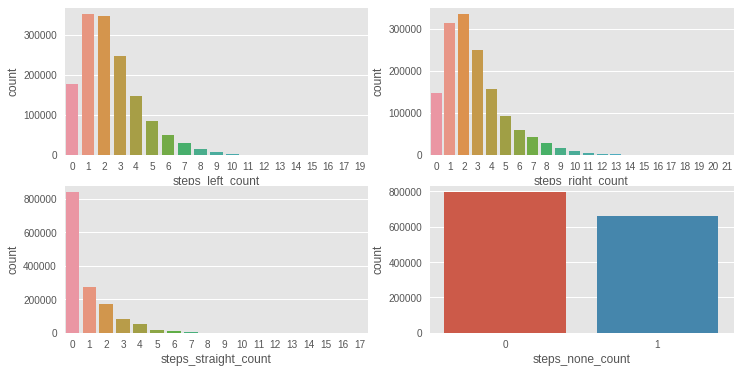

In [10]:
plt.subplot(221)
sns.countplot(train['steps_left_count'])
plt.subplot(222)
sns.countplot(train['steps_right_count'])
plt.subplot(223)
sns.countplot(train['steps_straight_count'])
plt.subplot(224)
sns.countplot(train['steps_none_count'])

In [11]:
test['steps_left_count'] = test['step_direction'].map(lambda steps: steps.count('left'))
test['steps_right_count'] = test['step_direction'].map(lambda steps: steps.count('right'))
test['steps_straight_count'] = test['step_direction'].map(lambda steps: steps.count('straight'))
test['steps_none_count'] = test['step_direction'].map(lambda steps: steps.count('none'))

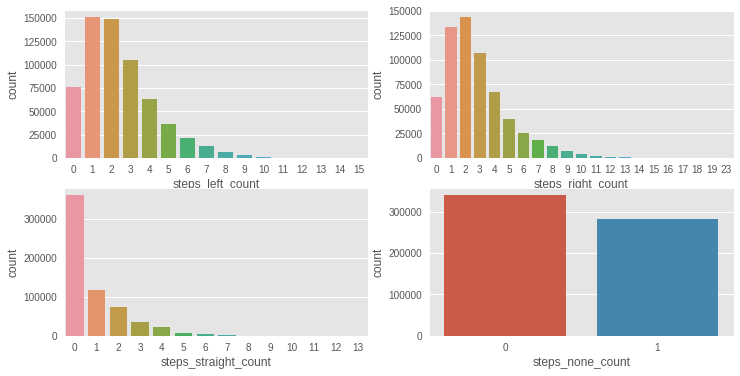

In [12]:
plt.subplot(221)
sns.countplot(test['steps_left_count'])
plt.subplot(222)
sns.countplot(test['steps_right_count'])
plt.subplot(223)
sns.countplot(test['steps_straight_count'])
plt.subplot(224)
sns.countplot(test['steps_none_count'])

# accidents 

In [13]:
accidents = pd.read_csv('../input/accidents_2016.csv')

In [15]:
print accidents.shape
accidents.head()

(111240, 28)


,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,3448403.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2016-05-27 17:30:00
1,NaN,NaN,40.70044,-73.815332,"(40.7004397, -73.8153324)",NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,3423067.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2016-04-27 09:04:00
2,QUEENS,11433.0,NaN,NaN,NaN,brewer boulevard,111th avenue,NaN,0.0,0.0,...,NaN,NaN,NaN,3458894.0,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-06-09 11:30:00
3,QUEENS,11423.0,NaN,NaN,NaN,199th street,100th avenue,NaN,0.0,0.0,...,NaN,NaN,NaN,3459472.0,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-06-07 22:06:00
4,QUEENS,11434.0,NaN,NaN,NaN,brewer boulevard,146th terrace,NaN,0.0,0.0,...,NaN,NaN,NaN,3458030.0,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016-06-07 22:06:00


In [16]:
train_fr.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


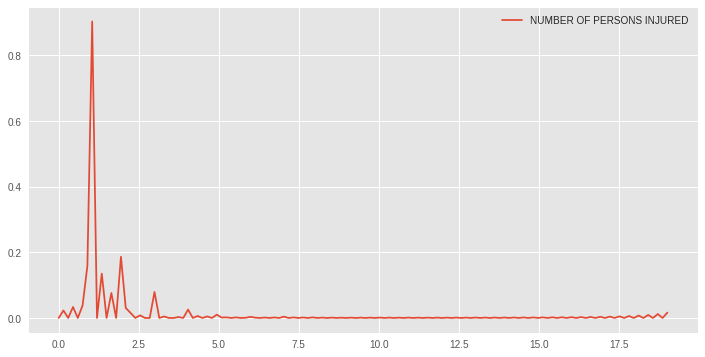

In [18]:
sns.kdeplot(accidents['NUMBER OF PERSONS INJURED'])

## second_fastest_routes

In [13]:
second_fastest_train = pd.read_csv('../input/second_fastest_routes_train.csv')

In [14]:
second_fastest_test = pd.read_csv('../input/second_fastest_routes_test.csv')

In [15]:
second_fastest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744760 entries, 0 to 744759
Data columns (total 12 columns):
id                      744760 non-null object
starting_street         744760 non-null object
end_street              744760 non-null object
total_distance          744760 non-null float64
total_travel_time       744760 non-null float64
number_of_steps         744760 non-null int64
street_for_each_step    744760 non-null object
distance_per_step       744760 non-null object
travel_time_per_step    744760 non-null object
step_maneuvers          744760 non-null object
step_direction          744760 non-null object
step_location_list      744760 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 68.2+ MB


In [16]:
second_fastest_train.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2377394,2nd Avenue,Washington Square West,2513.1,333.7,6,2nd Avenue|East 17th Street|5th Avenue|Washing...,546.4|836.7|826.8|164.2|139.1|0,66.6|110.8|114.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.983547,40.734263|-73.9..."
1,id1813257,3rd Avenue,1st Avenue,1704.0,140.2,5,3rd Avenue|3rd Avenue|East 65th Street|1st Ave...,131.4|807.6|443.9|321.1|0,11.3|64.9|38.3|25.7|0,depart|fork|turn|turn|arrive,right|slight right|right|left|arrive,"-73.969209,40.757919|-73.968457,40.758954|-73...."
2,id1436371,Broadway,West 4th Street,4839.7,556.3,8,Broadway|West 53rd Street|9th Avenue|West 14th...,55.6|458.4|3106.2|525.2|608.4|34.4|51.4|0,12.9|39.4|342.5|64.7|85.2|5.8|5.8|0,depart|turn|turn|turn|turn|turn|continue|arrive,right|right|left|left|right|left|straight|arrive,"-73.982587,40.763821|-73.982826,40.763355|-73...."
3,id1299289,7th Avenue,East 75th Street,5595.8,559.8,7,7th Avenue|West 30th Street|Madison Avenue|Eas...,132.4|739.1|2166.7|909.8|1455.6|192.2|0,24.2|96.1|220.3|69.7|121.9|27.6|0,depart|turn|turn|turn|turn|turn|arrive,left|left|left|right|left|left|arrive,"-73.991705,40.749512|-73.992463,40.748469|-73...."
4,id1187965,East 55th Street,West 49th Street,2605.1,221.4,6,East 55th Street|1st Avenue|East 57th Street|5...,83.2|165.7|1064.9|642.4|648.9|0,16|18.5|80.4|60.1|46.4|0,depart|turn|turn|turn|turn|arrive,none|right|left|left|right|arrive,"-73.963008,40.756644|-73.963871,40.757008|-73...."


In [17]:
second_fastest_train.columns = ["second_"+c if 'id' != c else c for c in second_fastest_train.columns.values]
second_fastest_test.columns = ["second_"+c if 'id' != c else c for c in second_fastest_test.columns.values]

In [18]:
train = train.merge(second_fastest_train, how='left', on='id')
test = test.merge(second_fastest_test, how='left', on='id')

In [19]:
train.shape, test.shape

((1458643, 121), (872328, 120))

In [20]:
train.head()

,dropoff_latitude,dropoff_longitude,id,is_store_and_fwd_flag,passenger_count,pickup_latitude,pickup_longitude,vendor_id,pickup_pca0,pickup_pca1,...,second_end_street,second_total_distance,second_total_travel_time,second_number_of_steps,second_street_for_each_step,second_distance_per_step,second_travel_time_per_step,second_step_maneuvers,second_step_direction,second_step_location_list
0,40.765602,-73.964630,id2875421,0,1,40.767937,-73.982155,2,0.007691,0.017053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.731152,-73.999481,id2377394,0,1,40.738564,-73.980415,1,0.007677,-0.012371,...,Washington Square West,2513.1,333.7,6.0,2nd Avenue|East 17th Street|5th Avenue|Washing...,546.4|836.7|826.8|164.2|139.1|0,66.6|110.8|114.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.983547,40.734263|-73.9..."
2,40.710087,-74.005333,id3858529,0,1,40.763939,-73.979027,2,0.004803,0.012879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.706718,-74.012268,id3504673,0,1,40.719971,-74.010040,2,0.038342,-0.029194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.782520,-73.972923,id2181028,0,1,40.793209,-73.973053,2,-0.002877,0.041749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train.drop(['starting_street', 'end_street', 'street_for_each_step',
            'distance_per_step', 'travel_time_per_step', 'step_maneuvers',
            'step_direction', 'step_location_list',
           'second_starting_street', 'second_end_street', 'second_street_for_each_step',
            'second_distance_per_step', 'second_travel_time_per_step', 'second_step_maneuvers',
            'second_step_direction', 'second_step_location_list'], axis=1, inplace=True)

test.drop(['starting_street', 'end_street', 'street_for_each_step',
            'distance_per_step', 'travel_time_per_step', 'step_maneuvers',
            'step_direction', 'step_location_list',
           'second_starting_street', 'second_end_street', 'second_street_for_each_step',
            'second_distance_per_step', 'second_travel_time_per_step', 'second_step_maneuvers',
            'second_step_direction', 'second_step_location_list'], axis=1, inplace=True)

In [22]:
train.head()

,dropoff_latitude,dropoff_longitude,id,is_store_and_fwd_flag,passenger_count,pickup_latitude,pickup_longitude,vendor_id,pickup_pca0,pickup_pca1,...,end_street_heavy,per_step_distance,per_travel_time,steps_left_count,steps_right_count,steps_straight_count,steps_none_count,second_total_distance,second_total_travel_time,second_number_of_steps
0,40.765602,-73.964630,id2875421,0,1,40.767937,-73.982155,2,0.007691,0.017053,...,765.385729,401.820000,32.980000,1,1,2,0,NaN,NaN,NaN
1,40.731152,-73.999481,id2377394,0,1,40.738564,-73.980415,1,0.007677,-0.012371,...,828.957560,418.866667,55.333333,2,2,0,1,2513.1,333.7,6.0
2,40.710087,-74.005333,id3858529,0,1,40.763939,-73.979027,2,0.004803,0.012879,...,1022.498559,691.300000,47.975000,5,7,3,0,NaN,NaN,NaN
3,40.706718,-74.012268,id3504673,0,1,40.719971,-74.010040,2,0.038342,-0.029194,...,942.063411,444.850000,58.950000,2,1,0,0,NaN,NaN,NaN
4,40.782520,-73.972923,id2181028,0,1,40.793209,-73.973053,2,-0.002877,0.041749,...,798.010030,322.980000,28.020000,2,2,0,0,NaN,NaN,NaN


In [23]:
second_fastest_train.head()

,id,second_starting_street,second_end_street,second_total_distance,second_total_travel_time,second_number_of_steps,second_street_for_each_step,second_distance_per_step,second_travel_time_per_step,second_step_maneuvers,second_step_direction,second_step_location_list
0,id2377394,2nd Avenue,Washington Square West,2513.1,333.7,6,2nd Avenue|East 17th Street|5th Avenue|Washing...,546.4|836.7|826.8|164.2|139.1|0,66.6|110.8|114.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.983547,40.734263|-73.9..."
1,id1813257,3rd Avenue,1st Avenue,1704.0,140.2,5,3rd Avenue|3rd Avenue|East 65th Street|1st Ave...,131.4|807.6|443.9|321.1|0,11.3|64.9|38.3|25.7|0,depart|fork|turn|turn|arrive,right|slight right|right|left|arrive,"-73.969209,40.757919|-73.968457,40.758954|-73...."
2,id1436371,Broadway,West 4th Street,4839.7,556.3,8,Broadway|West 53rd Street|9th Avenue|West 14th...,55.6|458.4|3106.2|525.2|608.4|34.4|51.4|0,12.9|39.4|342.5|64.7|85.2|5.8|5.8|0,depart|turn|turn|turn|turn|turn|continue|arrive,right|right|left|left|right|left|straight|arrive,"-73.982587,40.763821|-73.982826,40.763355|-73...."
3,id1299289,7th Avenue,East 75th Street,5595.8,559.8,7,7th Avenue|West 30th Street|Madison Avenue|Eas...,132.4|739.1|2166.7|909.8|1455.6|192.2|0,24.2|96.1|220.3|69.7|121.9|27.6|0,depart|turn|turn|turn|turn|turn|arrive,left|left|left|right|left|left|arrive,"-73.991705,40.749512|-73.992463,40.748469|-73...."
4,id1187965,East 55th Street,West 49th Street,2605.1,221.4,6,East 55th Street|1st Avenue|East 57th Street|5...,83.2|165.7|1064.9|642.4|648.9|0,16|18.5|80.4|60.1|46.4|0,depart|turn|turn|turn|turn|arrive,none|right|left|left|right|arrive,"-73.963008,40.756644|-73.963871,40.757008|-73...."


# weather data

In [3]:
trip_durations = train['trip_duration']
del train['trip_duration']
conbined_data = pd.concat([train, test])

weather_data = pd.read_csv('../input/weather_data_nyc_centralpark_2016.csv')
weather_data['day'] = weather_data['date'].map(lambda d: d.split('-')[0])
weather_data['month'] = weather_data['date'].map(lambda d: d.split('-')[1])

weather_data['day'] = weather_data['day'].astype(np.uint8)
weather_data['month'] = weather_data['month'].astype(np.uint8)

del weather_data['date']

df = pd.DataFrame({'year': [2016] * weather_data.shape[0],
                   'month': weather_data['month'],
                   'day': weather_data['day']})
weather_data['pickup_date'] = pd.to_datetime(df)
del weather_data['day']
del weather_data['month']
weather_data.columns = ['maximum_temerature', 'minimum_temperature', 'average_temperature', 'precipitation',
                        'snow_fall', 'snow_depth', 'pickup_date']

In [4]:
weather_data.head()

,maximum_temerature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,pickup_date
0,44,34,39.0,0,0,0,2016-01-01
1,40,30,35.0,0,0,0,2016-01-02
2,46,33,39.5,0,0,0,2016-01-03
3,35,13,24.0,0,0,0,2016-01-04
4,29,10,19.5,0,0,0,2016-01-05


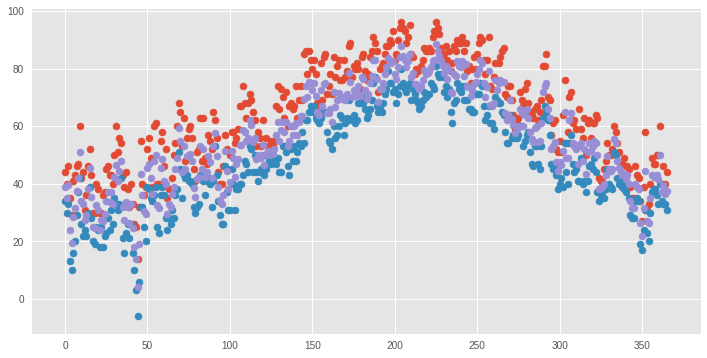

In [5]:
plt.scatter(range(weather_data.shape[0]), weather_data['maximum_temerature'])
plt.scatter(range(weather_data.shape[0]), weather_data['minimum_temperature'])
plt.scatter(range(weather_data.shape[0]), weather_data['average_temperature'])

In [8]:
set(weather_data['snow_depth'])

{'0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'T'}

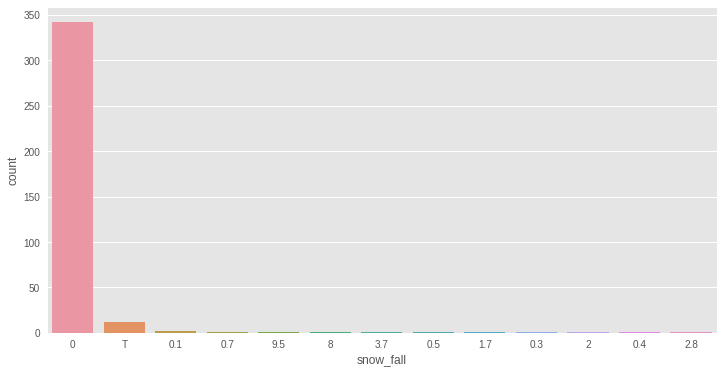

In [11]:
sns.countplot(weather_data['snow_fall'])

In [62]:
weather_data['precipitation'] = weather_data['precipitation'].map(lambda p: float(p) if p != 'T' else -1)
weather_data['snow_fall'] = weather_data['snow_fall'].map(lambda p: float(p) if p != 'T' else -1)
weather_data['snow_depth'] = weather_data['snow_depth'].map(lambda p: float(p) if p != 'T' else -1)

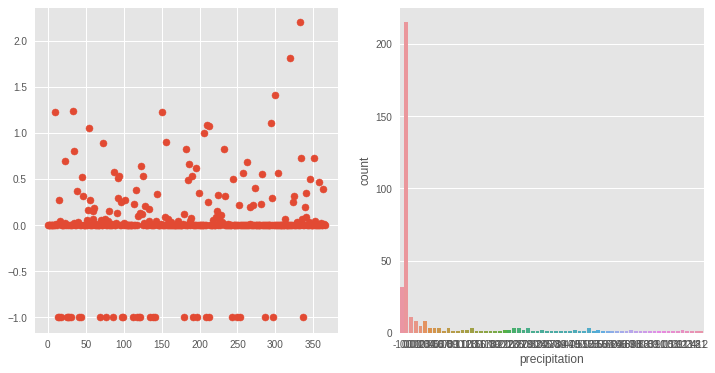

In [67]:
plt.subplot(121)
plt.scatter(range(weather_data.shape[0]), weather_data['precipitation'])
plt.subplot(122)
sns.countplot(weather_data['precipitation'])
plt.show()

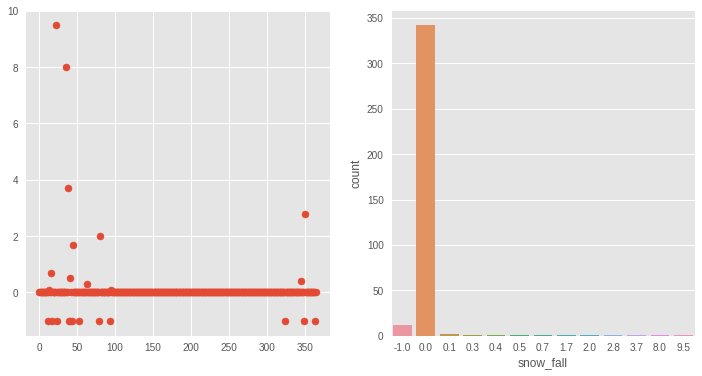

In [68]:
plt.subplot(121)
plt.scatter(range(weather_data.shape[0]), weather_data['snow_fall'])
plt.subplot(122)
sns.countplot(weather_data['snow_fall'])
plt.show()

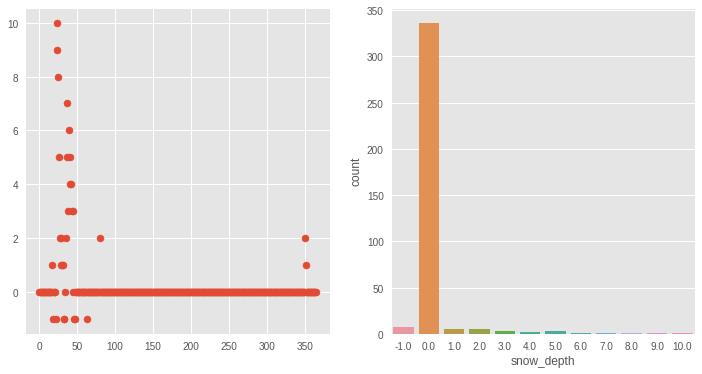

In [69]:
plt.subplot(121)
plt.scatter(range(weather_data.shape[0]), weather_data['snow_depth'])
plt.subplot(122)
sns.countplot(weather_data['snow_depth'])
plt.show()

In [46]:
conbined_data['pickup_datetime'] = pd.to_datetime(conbined_data['pickup_datetime'])
conbined_data['pickup_date'] = conbined_data['pickup_datetime'].dt.date
conbined_data['pickup_date'] = pd.to_datetime(conbined_data['pickup_date'])
weather_data['pickup_date'] = pd.to_datetime(weather_data['pickup_date'])

In [49]:
conbined_data = pd.merge(conbined_data, weather_data, on='pickup_date', how='left')